In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_location'].max()
Min = Milan['review_scores_location'].min()
Limites = [Min, Max]
Limites

[3.73, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.27

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.08180602193664578

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.73, 5.0, 16)
intervalos

array([3.73      , 3.81466667, 3.89933333, 3.984     , 4.06866667,
       4.15333333, 4.238     , 4.32266667, 4.40733333, 4.492     ,
       4.57666667, 4.66133333, 4.746     , 4.83066667, 4.91533333,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Ubicación mala",
    "Ubicación inaceptable",
    "Ubicación muy mala",
    "Ubicación deficiente",
    "Ubicación pobre",
    "Ubicación aceptable",
    "Ubicación adecuada",
    "Ubicación buena",
    "Ubicación muy buena",
    "Ubicación excelente",
    "Ubicación sobresaliente",
    "Ubicación impecable",
    "Ubicación increíble",
    "Ubicación excepcional",
    "Ubicación perfecta"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_location'] = pd.cut ( x = Milan ['review_scores_location'], bins = intervalos, labels = categorias )
Milan['review_scores_location']

0        Ubicación excelente
1        Ubicación impecable
2        Ubicación muy buena
3            Ubicación buena
4        Ubicación muy buena
                ...         
23700    Ubicación increíble
23701    Ubicación increíble
23702    Ubicación increíble
23703    Ubicación increíble
23704    Ubicación increíble
Name: review_scores_location, Length: 23705, dtype: category
Categories (15, object): ['Ubicación mala' < 'Ubicación inaceptable' < 'Ubicación muy mala' < 'Ubicación deficiente' ... 'Ubicación impecable' < 'Ubicación increíble' < 'Ubicación excepcional' < 'Ubicación perfecta']

In [12]:
table1 = freq_tbl(Milan['review_scores_location'])
table1

,review_scores_location,frequency,percentage,cumulative_perc
0,Ubicación increíble,7420,0.313014,0.313027
1,Ubicación perfecta,6151,0.259481,0.572519
2,Ubicación excepcional,2606,0.109935,0.682459
3,Ubicación impecable,2151,0.090740,0.773203
4,Ubicación excelente,1405,0.059270,0.832476
5,Ubicación sobresaliente,1265,0.053364,0.885842
6,Ubicación deficiente,699,0.029487,0.915331
7,Ubicación buena,644,0.027167,0.942499
8,Ubicación muy buena,532,0.022443,0.964943
9,Ubicación adecuada,342,0.014427,0.979371


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_location,frequency
0,Ubicación increíble,7420
1,Ubicación perfecta,6151
2,Ubicación excepcional,2606
3,Ubicación impecable,2151
4,Ubicación excelente,1405
5,Ubicación sobresaliente,1265
6,Ubicación deficiente,699
7,Ubicación buena,644
8,Ubicación muy buena,532
9,Ubicación adecuada,342


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_location')
Filtro_index

,frequency
review_scores_location,
Ubicación increíble,7420
Ubicación perfecta,6151
Ubicación excepcional,2606
Ubicación impecable,2151
Ubicación excelente,1405
Ubicación sobresaliente,1265
Ubicación deficiente,699
Ubicación buena,644
Ubicación muy buena,532


Text(0, 0.5, 'Frecuencia')

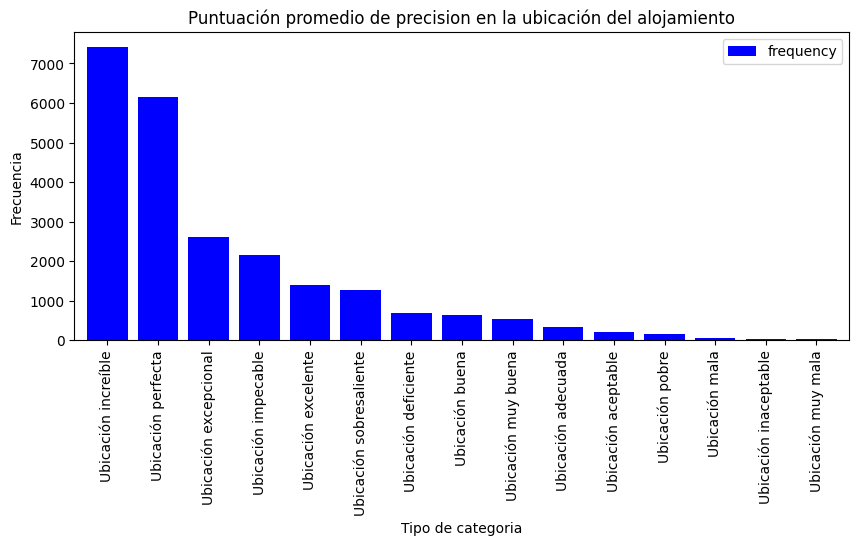

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la ubicación del alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')